In [55]:
import numpy as np
import pandas as pd
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fclusterdata

In [56]:
def get_dim(Im):
    """Takes an image as an input and gives dimensions for pixels (width and height)"""
    return Image.open(Im).size
def get_xy(Im):
    """Take an image and return all possible (x,y) coordinate combinations"""
    width, height = Image.open(Im).size
    return list(product(np.arange(width),np.arange(height)))
def get_rgb(Im):
    """Take an image and return rgb values for every pixel"""
    im = Image.open(Im) 
    pix = im.load()
    rgb = [pix[i,j] for i,j in get_xy(Im)]
    return rgb
def get_data(Im):
    """Take an image and extract all the coordinates and RGB values of each pixel. Returns a data frame 
    containing that information"""
    img_data = list(zip(get_xy(Im),get_rgb(Im)))
    df = []
    for i in img_data:
        columns = {'x':i[0][0],'y':i[0][1],'R':i[1][0],'G':i[1][1],'B':i[1][2]}
        df.append(columns)
    return pd.DataFrame(df)

In [57]:
df = get_data('BLUE.jpeg')
df.iloc[:,2:].drop_duplicates()

,R,G,B
0,86,140,200
36320,86,140,202
36376,86,141,198
39320,85,141,198
40880,86,140,204
...,...,...,...
520819,84,134,195
521553,80,133,203
521565,96,144,208
521568,91,135,198


In [59]:
center = sorted(list(range(4,256,8))*8)

In [60]:
list(zip(range(0,256),center))

[(0, 4),
 (1, 4),
 (2, 4),
 (3, 4),
 (4, 4),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 12),
 (9, 12),
 (10, 12),
 (11, 12),
 (12, 12),
 (13, 12),
 (14, 12),
 (15, 12),
 (16, 20),
 (17, 20),
 (18, 20),
 (19, 20),
 (20, 20),
 (21, 20),
 (22, 20),
 (23, 20),
 (24, 28),
 (25, 28),
 (26, 28),
 (27, 28),
 (28, 28),
 (29, 28),
 (30, 28),
 (31, 28),
 (32, 36),
 (33, 36),
 (34, 36),
 (35, 36),
 (36, 36),
 (37, 36),
 (38, 36),
 (39, 36),
 (40, 44),
 (41, 44),
 (42, 44),
 (43, 44),
 (44, 44),
 (45, 44),
 (46, 44),
 (47, 44),
 (48, 52),
 (49, 52),
 (50, 52),
 (51, 52),
 (52, 52),
 (53, 52),
 (54, 52),
 (55, 52),
 (56, 60),
 (57, 60),
 (58, 60),
 (59, 60),
 (60, 60),
 (61, 60),
 (62, 60),
 (63, 60),
 (64, 68),
 (65, 68),
 (66, 68),
 (67, 68),
 (68, 68),
 (69, 68),
 (70, 68),
 (71, 68),
 (72, 76),
 (73, 76),
 (74, 76),
 (75, 76),
 (76, 76),
 (77, 76),
 (78, 76),
 (79, 76),
 (80, 84),
 (81, 84),
 (82, 84),
 (83, 84),
 (84, 84),
 (85, 84),
 (86, 84),
 (87, 84),
 (88, 92),
 (89, 92),
 (90, 92),
 (91, 92),
 (92, 

In [61]:
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)

In [62]:
df

,x,y,R,G,B
0,0,0,84,140,204
1,0,1,84,140,204
2,0,2,84,140,204
3,0,3,84,140,204
4,0,4,84,140,204
...,...,...,...,...,...
562495,749,745,84,140,204
562496,749,746,84,140,204
562497,749,747,84,140,204
562498,749,748,84,140,204


In [63]:
df.to_numpy()

array([[  0,   0,  84, 140, 204],
       [  0,   1,  84, 140, 204],
       [  0,   2,  84, 140, 204],
       ...,
       [749, 747,  84, 140, 204],
       [749, 748,  84, 140, 204],
       [749, 749,  84, 140, 204]])

In [64]:
df = [tuple(i) for i in df.to_numpy()]

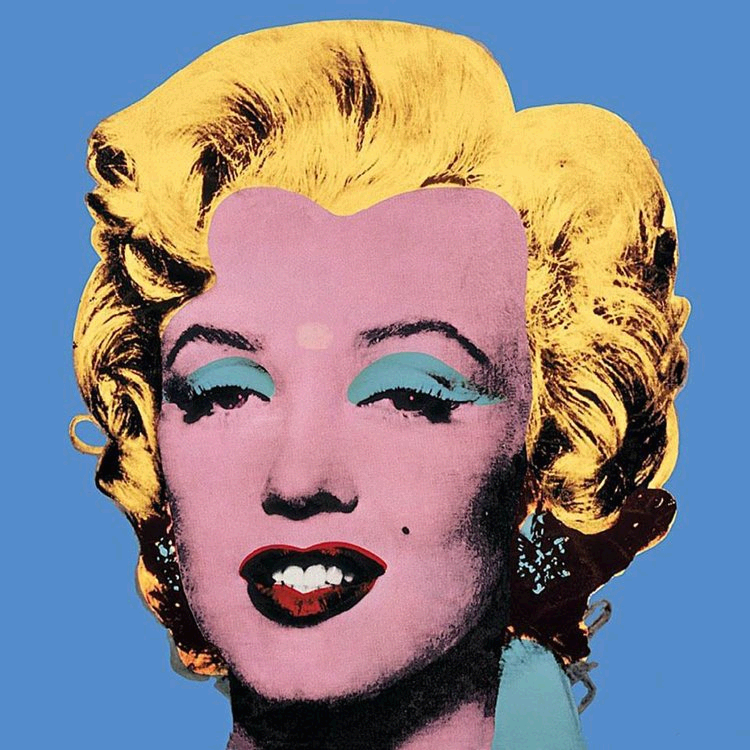

In [65]:
im = Image.open('BLUE.jpeg') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im

In [16]:
# im.save('BlueS.png')

In [66]:
df = get_data('BlueS.png')

In [67]:
df = df.iloc[:,2:].drop_duplicates()

In [68]:
df

,R,G,B
0,84,140,204
36376,84,140,196
45320,92,140,204
47625,92,140,196
48328,84,148,196
...,...,...,...
513385,172,180,212
515579,68,132,188
516302,228,236,228
516363,148,140,164


In [20]:
clst = AgglomerativeClustering(n_clusters = 16, linkage = 'average')
clsts = clst.fit(np.asarray(df))
df['Cluster'] = clsts.labels_

In [21]:
df

,R,G,B,Cluster
0,84,140,204,12
36376,84,140,196,12
45320,92,140,204,12
47625,92,140,196,12
48328,84,148,196,12
...,...,...,...,...
513385,172,180,212,13
515579,68,132,188,12
516302,228,236,228,6
516363,148,140,164,9


In [22]:
dists = linkage(np.asarray(df),method = 'average')

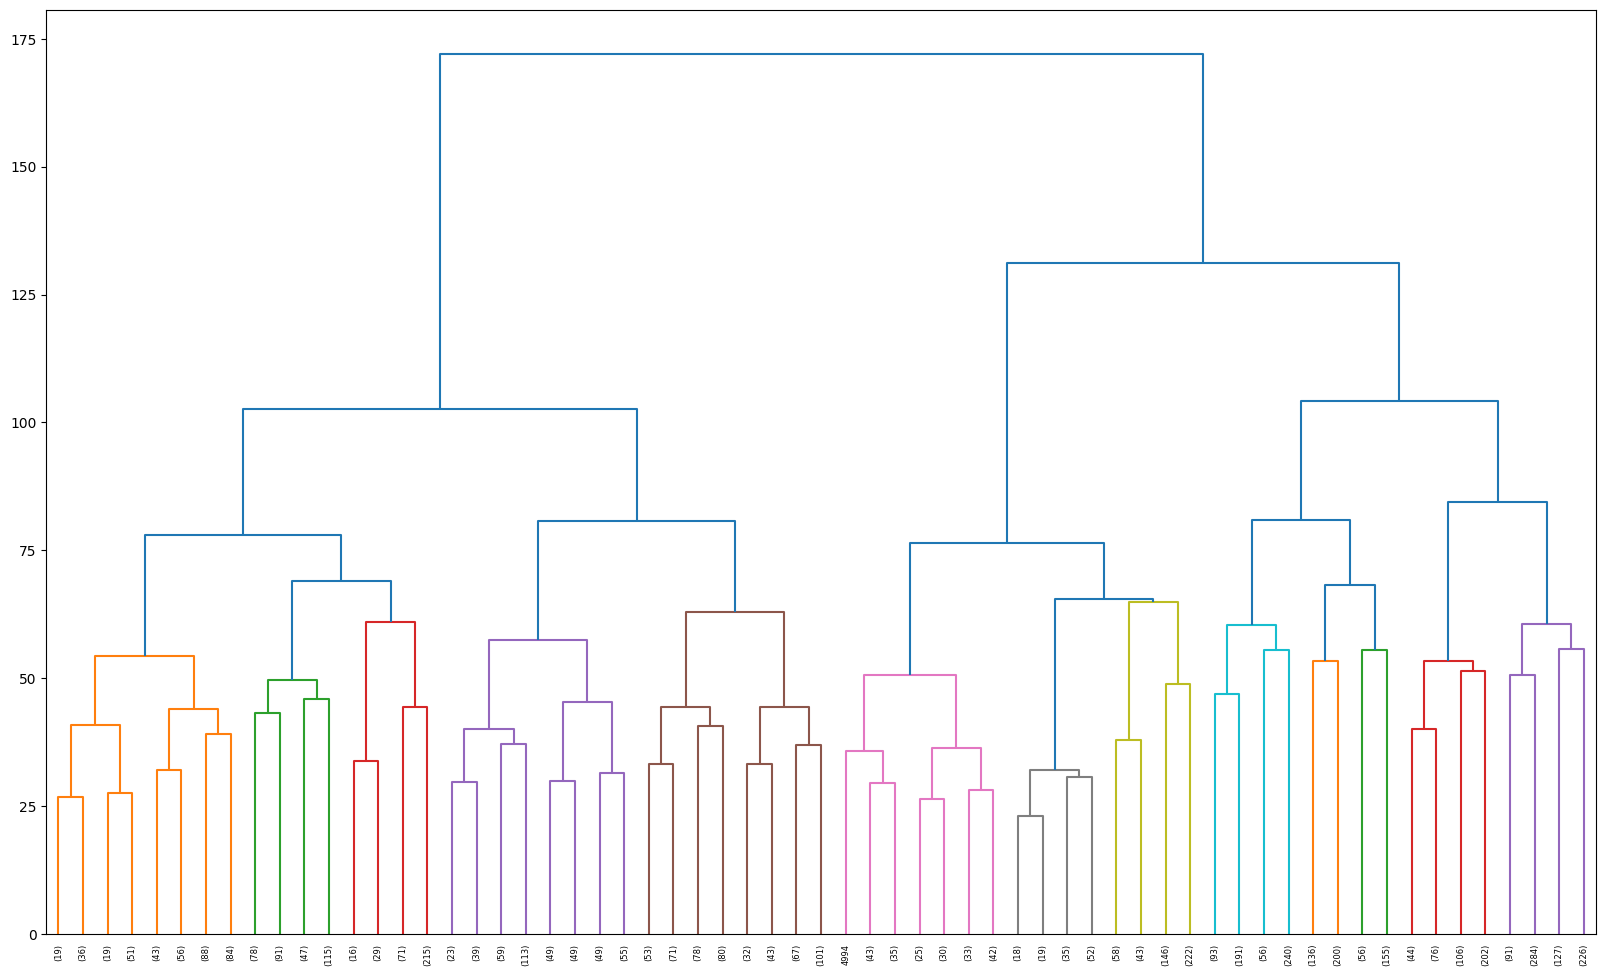

In [71]:
plt.figure(figsize = (20,12))
dendrogram(dists, p = 5, truncate_mode = 'level', color_threshold = 65)
plt.show()

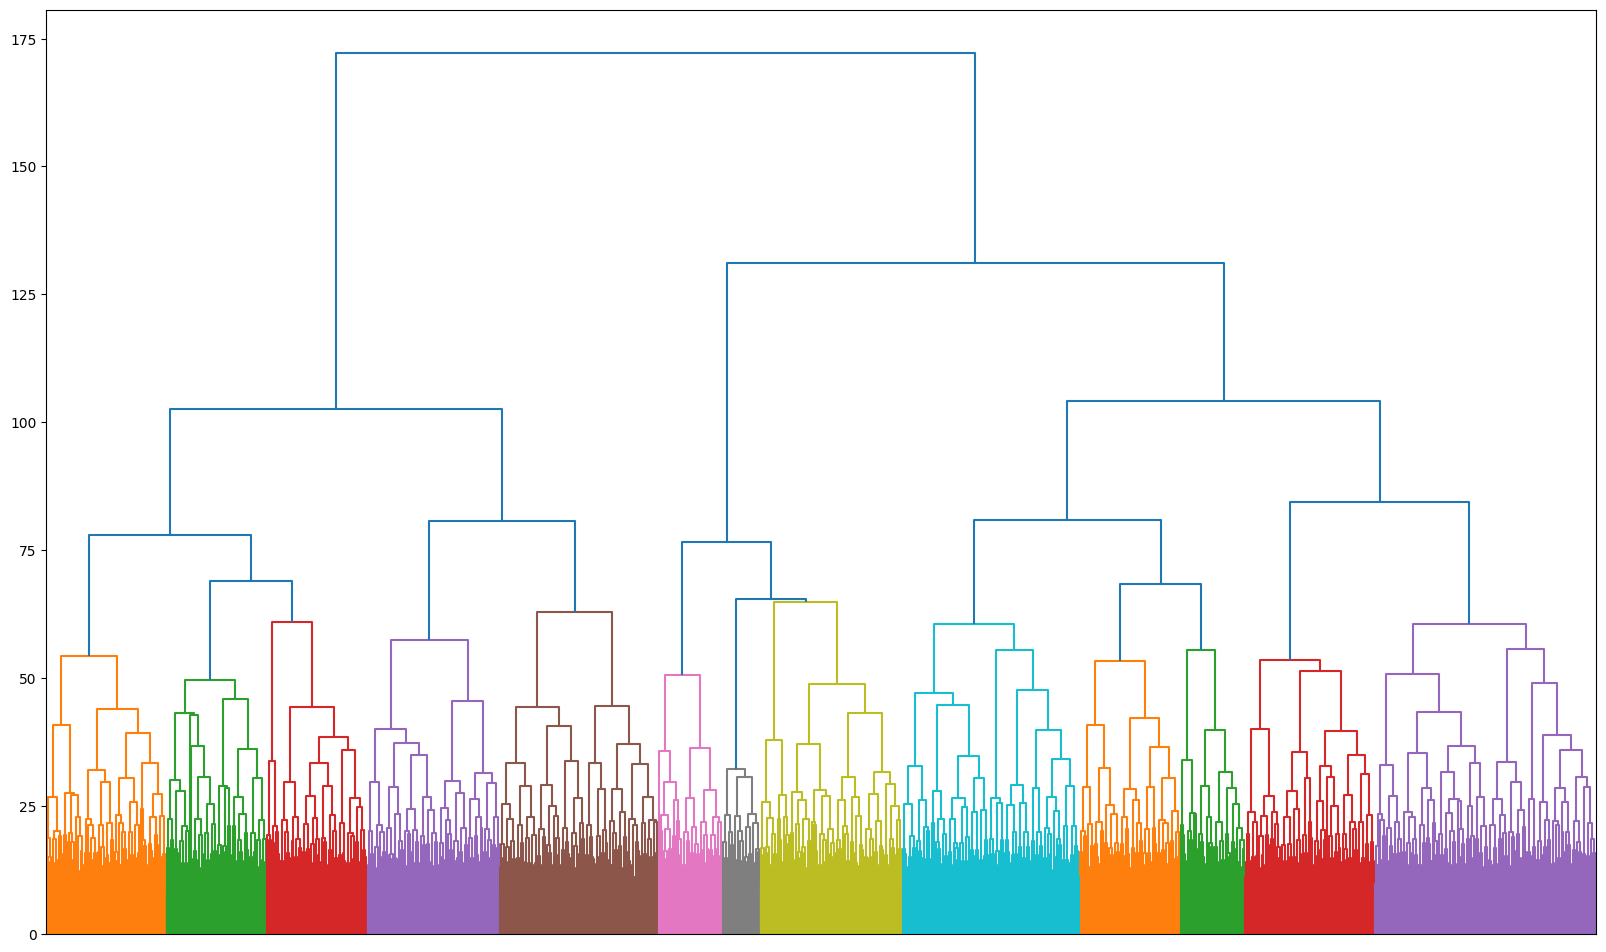

In [72]:
plt.figure(figsize = (20,12))
dendrogram(dists, no_labels = True, color_threshold = 65)
plt.show()

In [73]:
df['Cluster'] = fclusterdata(np.asarray(df),t = 16,criterion = 'maxclust', method = 'average')

In [24]:
dfo = get_data('BlueS.png')
dfo

,x,y,R,G,B
0,0,0,84,140,204
1,0,1,84,140,204
2,0,2,84,140,204
3,0,3,84,140,204
4,0,4,84,140,204
...,...,...,...,...,...
562495,749,745,84,140,204
562496,749,746,84,140,204
562497,749,747,84,140,204
562498,749,748,84,140,204


In [74]:
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [75]:
df

,x,y,R,G,B,Cluster
0,0,0,84,140,204,9
1,0,1,84,140,204,9
2,0,2,84,140,204,9
3,0,3,84,140,204,9
4,0,4,84,140,204,9
...,...,...,...,...,...,...
562495,687,329,68,132,188,9
562496,688,302,228,236,228,14
562497,688,363,148,140,164,11
562498,688,364,148,140,164,11


In [76]:
df['Cluster'].value_counts(normalize = True)

Cluster
9     0.344210
15    0.165140
12    0.148242
6     0.126837
13    0.054578
16    0.047804
11    0.022196
5     0.020610
4     0.017252
7     0.015810
1     0.011381
2     0.010000
10    0.008556
8     0.004933
14    0.002256
3     0.000196
Name: proportion, dtype: float64

In [77]:
ind = list(df['Cluster'].value_counts(normalize = True).index)

In [78]:
col = df.groupby('Cluster').median()[['R','G','B']]

In [79]:
col

,R,G,B
Cluster,,,
1,124.0,60.0,36.0
2,148.0,100.0,44.0
3,172.0,60.0,68.0
4,140.0,100.0,108.0
5,84.0,68.0,68.0
6,20.0,12.0,12.0
7,84.0,44.0,20.0
8,92.0,116.0,132.0
9,84.0,140.0,204.0


In [80]:
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
col = ['#%02x%02x%02x' % i for i in col]
col

['#548ccc',
 '#d494a4',
 '#f4d46c',
 '#140c0c',
 '#e4a4b4',
 '#dca454',
 '#6c9cac',
 '#544444',
 '#8c646c',
 '#542c14',
 '#7c3c24',
 '#94642c',
 '#74acb4',
 '#5c7484',
 '#e4dcd4',
 '#ac3c44']

In [81]:
df['Cluster'].value_counts()

Cluster
9     193618
15     92891
12     83386
6      71346
13     30700
16     26890
11     12485
5      11593
4       9704
7       8893
1       6402
2       5625
10      4813
8       2775
14      1269
3        110
Name: count, dtype: int64

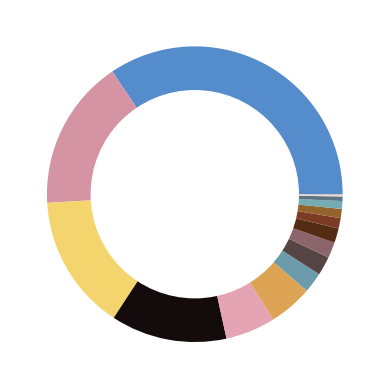

In [83]:
plt.pie(df['Cluster'].value_counts(), colors = col)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [54]:
clust_means = df.groupby(by=["Cluster"]).median()
clust_means.drop(columns = ['x', 'y'], inplace=True)
clust_means

,R,G,B
Cluster,,,
0,220.0,164.0,84.0
1,84.0,68.0,68.0
2,244.0,212.0,108.0
3,124.0,60.0,36.0
4,92.0,116.0,132.0
5,212.0,148.0,164.0
6,228.0,220.0,212.0
7,84.0,44.0,20.0
8,140.0,100.0,108.0


In [28]:
def inspect(Im,cluster,background = (255,255,255)):
    """View all the pixels in a specific cluster derived from HC"""
    ind = df.loc[df['Cluster'] != cluster,['x','y']]
    im = Image.open(Im)
    pix = im.load()
    for i,j in zip(list(ind['x']),list(ind['y'])):
        pix[i,j] = background
    return im    

In [29]:
bluem = Image.open('Blues.png')

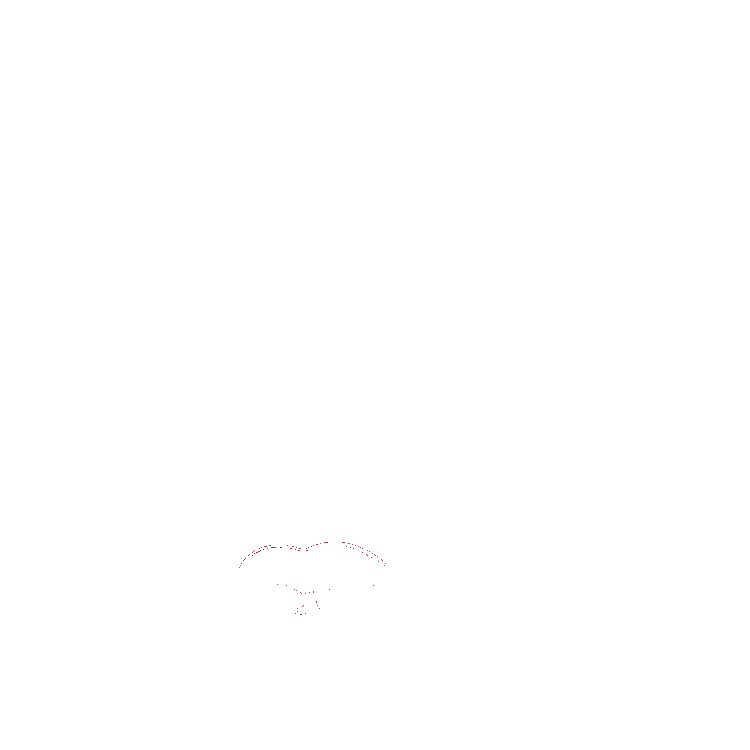

In [30]:
inspect('BlueS.png',15)